# Load the New Results

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

### Pick Metric
NSS, SIM, IG, AUC

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_07.p',
 '2019-05-12_results-with-std.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '2019-05-11_results-with-std.p',
 '19-02-01_results_over_baseline_faces_03.p',
 '19-01-31_results.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_face_05.p']

## Pick the Dataset and Load Required Data

In [3]:
os.chdir('../results/')
(summary, context, model, metric) = pickle.load(open( "2019-05-12_results-with-std.p", "rb")) 

In [4]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 5, 8)
['all', 'person', 'no person', 'animal', 'sports', 'electronic']
['gbvs', 'gbvs_face_03', 'gbvs_face_05', 'gbvs_face_07', 'dg']
['nss mean', 'sim mean', 'ig mean', 'auc mean', 'nss std', 'sim std', 'ig std', 'auc std']


In [5]:
ig_mean = summary[:,:,2]
auc_mean = summary[:,:,3]

ig_std = summary[:,:,6]
auc_std = summary[:,:,7]

### AUC

In [6]:
df_auc_mean = pd.DataFrame(data=auc_mean, columns=model, index=context)
df_auc_std = pd.DataFrame(data=auc_std, columns=model, index=context)

In [7]:
df_auc_mean.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,0.749465,0.752009,0.752898,0.753201,0.760010
person,0.758711,0.763010,0.764442,0.764895,0.773875
no person,0.734478,0.734177,0.734184,0.734245,0.737536
animal,0.734344,0.735972,0.736536,0.736809,0.749271
sports,0.783232,0.784090,0.784087,0.784198,0.784495


In [8]:
df_auc_std.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,0.089805,0.090078,0.090262,0.090222,0.094972
person,0.090389,0.090345,0.090460,0.090369,0.093331
no person,0.086782,0.086728,0.086736,0.086693,0.093296
animal,0.095960,0.097058,0.097695,0.097894,0.102641
sports,0.090115,0.091386,0.091811,0.092127,0.090676


### IG

In [9]:
df_ig_mean = pd.DataFrame(data=ig_mean, columns=model, index=context)
df_ig_std = pd.DataFrame(data=ig_std, columns=model, index=context)

In [10]:
df_ig_mean.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,4.389129,4.401902,4.409638,4.407047,3.110164
person,4.261897,4.283458,4.295767,4.291430,2.745240
no person,4.595379,4.593905,4.594228,4.594469,3.701723
animal,4.601708,4.607203,4.612659,4.618031,2.988734
sports,4.191043,4.194267,4.198131,4.180200,1.685864


In [11]:
df_ig_std.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,2.754745,2.757972,2.756112,2.750730,3.645712
person,2.806243,2.810237,2.807265,2.798518,3.934831
no person,2.656238,2.659893,2.660777,2.660797,3.028623
animal,2.659255,2.658761,2.658060,2.656514,3.833621
sports,2.997117,3.006711,3.012042,3.017558,4.809530


## Plot by Metric, including Std

### AUC

#### Get DF

In [12]:
print(df_auc_mean.head(2))
print(df_auc_std.head(2))

            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     0.749465      0.752009      0.752898      0.753201  0.760010
person  0.758711      0.763010      0.764442      0.764895  0.773875
            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     0.089805      0.090078      0.090262      0.090222  0.094972
person  0.090389      0.090345      0.090460      0.090369  0.093331


In [13]:
dg_mean = df_auc_mean['dg']
dg_std = df_auc_std['dg']

In [14]:
gbvs_mean = df_auc_mean['gbvs']
gbvs_std = df_auc_std['gbvs']

In [15]:
gbvs_mean_f03 = df_auc_mean['gbvs_face_03']
gbvs_std_f03 = df_auc_std['gbvs_face_03']

In [16]:
gbvs_mean_f05 = df_auc_mean['gbvs_face_05']
gbvs_std_f05 = df_auc_std['gbvs_face_05']

In [17]:
gbvs_mean_f07 = df_auc_mean['gbvs_face_07']
gbvs_std_f07 = df_auc_std['gbvs_face_07']

#### Plot GBVS alone

In [18]:
t = np.arange(0,6)
d = 0.8
m = 8

In [19]:
matplotlib.rcParams.update({'font.size': 16})

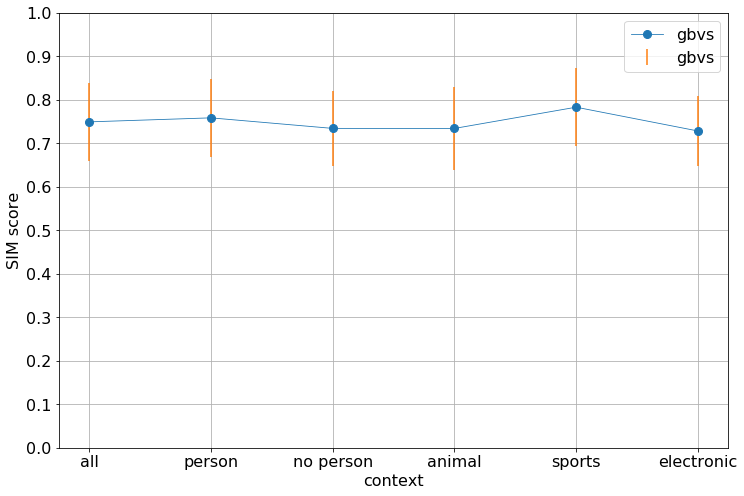

In [20]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None')

plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

### IG

#### Get DF

In [21]:
print(df_ig_mean.head(2))
print(df_ig_std.head(2))

            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     4.389129      4.401902      4.409638      4.407047  3.110164
person  4.261897      4.283458      4.295767      4.291430  2.745240
            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     2.754745      2.757972      2.756112      2.750730  3.645712
person  2.806243      2.810237      2.807265      2.798518  3.934831


In [22]:
dg_mean = df_ig_mean['dg']
dg_std = df_ig_std['dg']

In [23]:
gbvs_mean = df_ig_mean['gbvs']
gbvs_std = df_ig_std['gbvs']

In [24]:
gbvs_mean_f03 = df_ig_mean['gbvs_face_03']
gbvs_std_f03 = df_ig_std['gbvs_face_03']

In [25]:
gbvs_mean_f05 = df_ig_mean['gbvs_face_05']
gbvs_std_f05 = df_ig_std['gbvs_face_05']

In [26]:
gbvs_mean_f07 = df_ig_mean['gbvs_face_07']
gbvs_std_f07 = df_ig_std['gbvs_face_07']

#### Plot GBVS alone

In [27]:
t = np.arange(0,6)
d = 0.8
m = 8

In [28]:
matplotlib.rcParams.update({'font.size': 16})

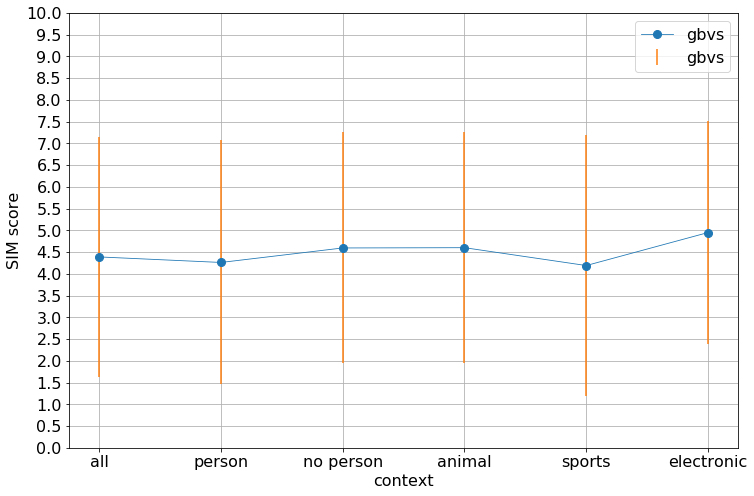

In [34]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None')

plt.grid()
plt.yticks(np.arange(0, 10.1, step=0.5))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();